In [1]:
import numpy as np

from matplotlib import pyplot as plt
from src.environments.mg_simple import MGSimple
from src.rl.a2c.c_mg_simple import set_all_seeds


/home/roberto.guillen/.conda/envs/bcte/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Zero agent

In [2]:
set_all_seeds(0)
batch_size = 1
env = MGSimple(batch_size=batch_size, steps=24, min_temp=29, max_temp=31, peak_pv_gen=1, peak_grid_gen=1, peak_load=1, disable_noise=True)

# Initialize states and rewards

state_0, r_0, done, _ = env.reset()

states_za, rewards_za, actions_za = [], [], []
states_za.append(state_0)
rewards_za.append(r_0)
while not done:

    action = np.zeros((batch_size, 1))

    s_t, r_t, done, _ = env.step(action)

    states_za.append(s_t)
    rewards_za.append(r_t)
    actions_za.append(action)

states_za = np.stack(states_za, axis=1)
rewards_za = np.stack(rewards_za, axis=1)
actions_za = np.stack(actions_za, axis=1)
rewards_za.sum()

-1.2022466296243146

In [3]:
rewards_za.squeeze()

array([ 0.        , -0.03371715, -0.03411645, -0.03384663, -0.03370772,
       -0.03341677, -0.05795015, -0.20955795, -0.29083287,  0.01090137,
        0.02454354,  0.01956496,  0.02142063,  0.02123992,  0.01902277,
        0.02371799,  0.00578379, -0.08494636, -0.12693972, -0.09762758,
       -0.11416803, -0.09810868, -0.05831798, -0.04118755])

In [4]:
states_za.squeeze()[:,(0,2,3,4,5)]

array([[0.00000000e+00, 0.00000000e+00, 2.80976270e-01, 6.00000000e-02,
        1.50000000e-02],
       [1.00000000e+00, 0.00000000e+00, 2.84303787e-01, 6.00000000e-02,
        1.50000000e-02],
       [2.00000000e+00, 0.00000000e+00, 2.82055268e-01, 6.00000000e-02,
        1.50000000e-02],
       [3.00000000e+00, 0.00000000e+00, 2.80897664e-01, 6.00000000e-02,
        1.50000000e-02],
       [4.00000000e+00, 0.00000000e+00, 2.78473096e-01, 6.00000000e-02,
        1.50000000e-02],
       [5.00000000e+00, 0.00000000e+00, 4.82917882e-01, 6.00000000e-02,
        1.50000000e-02],
       [6.00000000e+00, 2.15119988e-01, 9.42751744e-01, 1.20000000e-01,
        3.00000000e-02],
       [7.00000000e+00, 4.50044074e-01, 1.08783546e+00, 1.80000000e-01,
        4.50000000e-02],
       [8.00000000e+00, 6.56986599e-01, 4.89273255e-01, 2.60000000e-01,
        6.50000000e-02],
       [9.00000000e+00, 8.23080879e-01, 2.77668830e-01, 1.80000000e-01,
        4.50000000e-02],
       [1.00000000e+01, 9.3799

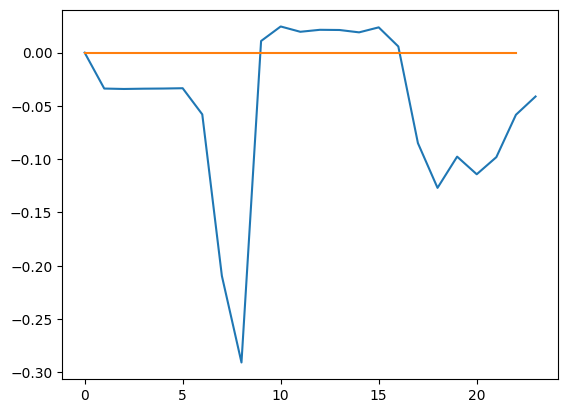

In [5]:
plt.plot(rewards_za.squeeze())
plt.plot(actions_za.squeeze())

# Random Agent

In [31]:
set_all_seeds(0)
batch_size = 1
env = MGSimple(batch_size=batch_size, steps=24, min_temp=29, max_temp=31, peak_pv_gen=1, peak_grid_gen=1, peak_load=1, disable_noise=True)

# Initialize states and rewards

state_0, r_0, done, _ = env.reset()

states_ra, rewards_ra, actions_ra = [], [], []

while not done:

    action = np.random.uniform(low=-1, high=1, size=(batch_size, 1))

    s_t, r_t, done, _ = env.step(action)

    states_ra.append(s_t)
    rewards_ra.append(r_t)
    actions_ra.append(action)

states_ra = np.stack(states_ra, axis=1)
rewards_ra = np.stack(rewards_ra, axis=1)
actions_ra = np.stack(actions_ra, axis=1)
rewards_ra.sum()

-1.9565174889513146

In [34]:
np.random.uniform(low=-1, high=1, size=(batch_size, 1)).shape

(1, 1)

# CVX Agent

In [7]:
set_all_seeds(0)
batch_size = 1
env = MGSimple(batch_size=batch_size, steps=24, min_temp=29, max_temp=31, peak_pv_gen=1, peak_grid_gen=1, peak_load=1, disable_noise=True)

# Initialize states and rewards

s_t, r_t, done, _ = env.reset()

states_ra, rewards_ra, actions_ra = [], [], []

perf_actions = [ 1.87618149e-01,  1.16353135e-01,  8.45745864e-02,  7.83851802e-02,
         9.81474354e-02, -4.22038145e-02, -2.47501938e-01, -2.75372733e-01,
         5.67474161e-01,  2.32525839e-01, -2.68996106e-01, -1.30855062e-01,
        -1.30862054e-01, -2.69286778e-01,  1.91850189e-01,  5.15841571e-01,
         9.23082401e-02,  1.19832551e-10, -2.12988428e-01, -3.68287674e-01,
        -2.18723898e-01,  1.26685365e-01,  2.85300459e-01,  3.49321574e-01]
         
while not done:

    action = np.ones((batch_size, 1))
    action = action * perf_actions[int(s_t[0,0])]

    s_t, r_t, done, _ = env.step(action)

    states_ra.append(s_t)
    rewards_ra.append(r_t)
    actions_ra.append(action)

states_ra = np.stack(states_ra, axis=1)
rewards_ra = np.stack(rewards_ra, axis=1)
actions_ra = np.stack(actions_ra, axis=1)
rewards_ra.sum()

-1.688640573655803

In [12]:
states_ra[0,:,2]
# states_ra[0,:,7]#SOC

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21511999, 0.45004407, 0.6569866 , 0.82308088, 0.93799998,
       0.99459878, 0.98935825, 0.92260421, 0.79848711, 0.62472395,
       0.41211849, 0.17388949, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [36]:
states_ra.shape, rewards_ra.shape,actions_ra.shape


((1, 23, 8), (1, 23, 1), (1, 23, 1))

# A2C Causality cont.

In [7]:
import traceback

from src.environments.mg_simple import MGSimple
from src.rl.a2c.c_mg_simple import Agent

# Get arguments from command line

disable_logging = False
disable_noise = True
batch_size = 8
training_steps = 1500
rollout_steps = 24
actor_lr = 0.0001
critic_lr = 0.001
actor_nn = 64
critic_nn = 64
gamma = 1
enable_gpu = True
central_agent = False # Not needed yet
random_soc_0 = False
encoding = False # Not needed yet
extended_observation = False # Not needed yet
epsilon = 0.001

# Start wandb logger

try:

    '''
        Setup all the configurations for Wandb
    '''

    wdb_config={
        "training_steps": training_steps,
        "batch_size": batch_size,
        "rollout_steps": rollout_steps,
        "agent_actor_lr": actor_lr,
        "agent_critic_lr": critic_lr,
        "agent_actor_nn": actor_nn,
        "agent_critic_nn": critic_nn,
        "gamma": gamma,
        "central_agent": central_agent,
        "random_soc_0": random_soc_0,
        "encoding": encoding,
        "extended_observation": extended_observation,
        "epsilon": epsilon,
    }

    '''
        Run the simulator
    '''

    set_all_seeds(0)

    # Instantiate the environment

    my_env = MGSimple(
        batch_size=batch_size, steps = rollout_steps, min_temp = 29, max_temp = 31, peak_pv_gen = 1, peak_grid_gen = 1, peak_load = 1,
        random_soc_0=random_soc_0, disable_noise=disable_noise
    )

    # Instantiate the agent

    agent = Agent(
        env=my_env, critic_lr=critic_lr, actor_lr=actor_lr, actor_nn=actor_nn, critic_nn=critic_nn, batch_size=batch_size, gamma=gamma,
        extended_obs=extended_observation, wandb_dict=wdb_config, enable_gpu=enable_gpu, disable_wandb=disable_logging,
    )

    # Launch the training

    all_states, all_rewards, all_actions = agent.train(training_steps=training_steps, epsilon=epsilon)

    # Finish Wandb execution

    agent.wdb_logger.finish()

except (RuntimeError, KeyboardInterrupt):

    traceback.print_exc()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: guti. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/roberto.guillen/.netrc
wandb: Currently logged in as: guti (optimllab). Use `wandb login --relogin` to force relogin


Running on GPU


  0%|          | 2/1500 [00:09<1:40:09,  4.01s/it]

Saving model on step: 0


  3%|▎         | 52/1500 [00:44<15:13,  1.58it/s] 

Saving model on step: 50


  7%|▋         | 101/1500 [01:15<18:36,  1.25it/s]

Saving model on step: 100


 10%|█         | 151/1500 [01:47<13:15,  1.70it/s]

Saving model on step: 150


 12%|█▏        | 181/1500 [02:06<11:40,  1.88it/s]

# A2C Causality disc.

In [ ]:
import traceback

from src.environments.mg_simple import MGSimple
from src.rl.a2c.d_mg_simple import Agent, set_all_seeds

# Get arguments from command line

disable_logging = True
disable_noise = True
batch_size = 8
training_steps = 1500
rollout_steps = 24
actor_lr = 0.0005
critic_lr = 0.001
actor_nn = 256
critic_nn = 64
gamma = 1
enable_gpu = True
central_agent = False # Not needed yet
random_soc_0 = False
encoding = False # Not needed yet
extended_observation = False # Not needed yet
epsilon = 0.001

# Start wandb logger

try:

    '''
        Setup all the configurations for Wandb
    '''

    wdb_config={
        "training_steps": training_steps,
        "batch_size": batch_size,
        "rollout_steps": rollout_steps,
        "agent_actor_lr": actor_lr,
        "agent_critic_lr": critic_lr,
        "agent_actor_nn": actor_nn,
        "agent_critic_nn": critic_nn,
        "gamma": gamma,
        "central_agent": central_agent,
        "random_soc_0": random_soc_0,
        "encoding": encoding,
        "extended_observation": extended_observation,
        "epsilon": epsilon,
    }

    '''
        Run the simulator
    '''

    set_all_seeds(0)

    # Instantiate the environment

    my_env = MGSimple(
        batch_size=batch_size, steps = rollout_steps, min_temp = 29, max_temp = 31, peak_pv_gen = 1, peak_grid_gen = 1, peak_load = 1,
        random_soc_0=random_soc_0, disable_noise=disable_noise
    )

    # Instantiate the agent

    agent = Agent(
        env=my_env, critic_lr=critic_lr, actor_lr=actor_lr, actor_nn=actor_nn, critic_nn=critic_nn, batch_size=batch_size, gamma=gamma,
        extended_obs=extended_observation, wandb_dict=wdb_config, enable_gpu=enable_gpu, disable_wandb=disable_logging,
    )

    # Launch the training

    all_states, all_rewards, all_actions = agent.train(training_steps=training_steps, epsilon=epsilon)

    # Finish Wandb execution

    agent.wdb_logger.finish()

except (RuntimeError, KeyboardInterrupt):

    traceback.print_exc()

print('A2C training completed')

# Plots

In [ ]:
all_rewards = np.stack(all_rewards, axis=0).squeeze()
all_actions = np.stack(all_actions, axis=0).squeeze()
all_states = np.stack(all_states, axis=0).squeeze()

plt.plot(all_rewards[0,:,0], label='reward 0 0')
plt.plot(all_rewards[250,:,0], label='reward 250 0')
plt.plot(all_rewards[1499,:,0], label='reward 499 0')
plt.legend()
plt.show()

In [ ]:
avg_reward = all_rewards.sum(axis=1).mean(axis=1)

plt.plot(avg_reward)
plt.show()

In [ ]:
plt.plot(all_actions[0,:,0], label='actions 0')
plt.plot(all_actions[250,:,0], label='actions 250')
plt.plot(all_actions[1499,:,0], label='actions 499')
plt.legend()
plt.show()

In [ ]:
avg_action = all_actions.mean(axis=1).mean(axis=1)

plt.plot(avg_action)
plt.show()

In [ ]:
all_socs = all_states[:,:,:,8]

plt.plot(all_socs[0,:,0], label='soc 0')
plt.plot(all_socs[250,:,0], label='soc 250')
plt.plot(all_socs[1499,:,0], label='soc 499')
plt.legend()
plt.show()

In [ ]:
all_net_energy = all_states[:,:,:,4]
remaining_energy = my_env.mg.remaining_energy

plt.plot(remaining_energy, label='remaining energy')
plt.plot(all_net_energy[0,:,0], label='net energy 0')
plt.plot(all_net_energy[250,:,0], label='net energy 250')
plt.plot(all_net_energy[499,:,0], label='net energy 499')
plt.legend()
plt.show()

In [ ]:
remaining_energy = my_env.mg.pv_gen

remaining_energy.shape

plt.plot(remaining_energy, label='remaining energy')
plt.legend()
plt.show()